# Import of Libraries

In [1]:
# Data handling
import numpy as np
import pandas as pd

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix


# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import decomposition




# XGBoost (must be installed separately)
from xgboost import XGBClassifier

# Scaling/Dimensionality Reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Visualization
import seaborn as sn
import matplotlib.pyplot as plt


# File read

In [2]:
# Set display options
pd.set_option("display.max_rows", 15)
pd.options.mode.chained_assignment = None

# File paths
dataset_folder = 'Datasets'
filename = f'{dataset_folder}/data11tumors2.csv'

# Reading the CSV files
training_data = pd.read_csv(filename)

# Displaying the data from the three CSV files
print("Data from the first CSV file (data11tumors2.csv):")
print(training_data)


Data from the first CSV file (data11tumors2.csv):
     Class   D1   D2   D3  D4   D5   D6    D7   D8    D9  ...  D12524  D12525  \
0        7  153  228   32  30  -36   48   984  -19   537  ...     100      30   
1        7  154   99   43  55   66   63  5051  -26  1001  ...      27      43   
2        7   84   85   19  28 -104   28  2387  -80  1131  ...     -32      51   
3        7  234  169   40  36   81    6  2657   -6  1214  ...      43      52   
4        7  104   58   42  13  107    5  3562   18  1464  ...     159      42   
..     ...  ...  ...  ...  ..  ...  ...   ...  ...   ...  ...     ...     ...   
169      0  157  578   40  58    5  -49    57  -29  3306  ...       4      45   
170      0  286  882  110 -19 -142  -66    -5   23  2701  ...     -91     130   
171      0  579  667   55 -41  -98 -138  -164  -61  2812  ...    -110     107   
172      0  252  582   88   3   44 -162   553 -150  2020  ...     -66      92   
173      0   83  420   14  84   12    1   153  -38  1833  .

# Concatenating data

In [3]:
# # Concatenate the dataframes
# training_data = pd.concat([training_data1, training_data2, training_data3], ignore_index=True)

# # Display the combined dataframe
# print(training_data)


# Basic statistics 

In [4]:
training_data.describe()

,Class,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D12524,D12525,D12526,D12527,D12528,D12529,D12530,D12531,D12532,D12533
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,4.425287,218.413793,537.942529,71.965517,83.706897,-67.155172,-16.568966,644.988506,76.609195,1472.890805,...,-1.327586,93.120690,138.028736,2.839080,97.948276,62.850575,102.396552,12.913793,206.942529,-220.873563
std,3.245743,117.290761,268.926376,43.827156,122.828468,141.340339,62.832499,1092.470272,863.362875,650.125888,...,96.165089,45.964957,67.895485,44.568288,95.784336,80.848968,127.692587,27.441552,402.505214,217.480811
min,0.000000,-122.000000,30.000000,-24.000000,-80.000000,-900.000000,-206.000000,-551.000000,-205.000000,23.000000,...,-235.000000,12.000000,-26.000000,-146.000000,-349.000000,-184.000000,-75.000000,-56.000000,37.000000,-992.000000
25%,2.000000,148.750000,360.000000,44.000000,24.250000,-129.750000,-58.000000,-32.250000,-67.750000,1060.250000,...,-54.750000,59.250000,92.250000,-20.500000,46.000000,16.000000,20.500000,-4.000000,96.000000,-332.500000
50%,4.000000,210.500000,520.500000,65.000000,65.000000,-43.500000,-15.000000,146.000000,-35.500000,1427.500000,...,-5.500000,87.500000,131.500000,7.000000,113.000000,43.000000,73.500000,10.000000,142.000000,-208.500000
75%,7.000000,281.750000,706.750000,87.750000,111.000000,26.500000,23.000000,838.750000,-3.750000,1774.500000,...,41.000000,118.750000,169.500000,33.500000,155.500000,96.750000,145.000000,25.500000,210.500000,-142.000000
max,10.000000,616.000000,1419.000000,247.000000,1307.000000,264.000000,138.000000,5218.000000,10019.000000,4120.000000,...,452.000000,270.000000,414.000000,100.000000,480.000000,485.000000,896.000000,109.000000,4888.000000,1351.000000


# class distribution

In [5]:
# class distribution
print(training_data.groupby('Class').size())

Class
0     27
1      8
2     26
3     23
4     12
5     11
6      7
7     26
8      6
9     14
10    14
dtype: int64


# Separation of labels and features 

In [6]:
label_vectors = training_data['Class'].values
feature_vectors = training_data.drop(['Class'], axis=1).values
label_vectors

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,  2, 10,
        4,  3,  0,  6,  0,  0,  3,  2,  9, 10,  7,  7,  2,  2,  5,  2,  0,
        9,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  9, 10,  9, 10, 10,  9,
       10,  2,  2,  2,  2,  2,  2,  2,  2,  2,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0], dtype=int64)

# Information scaling

In [7]:
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors_scaler = scaler.transform(feature_vectors)

# Information Split - without scaling

In [8]:
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, label_vectors, test_size=validation_size, random_state=seed)
X_train.shape

(139, 12533)

# Information Split with scaling

In [9]:
validation_size = 0.2
seed = 7
X_trainScaler, X_validationScaler, Y_trainScaler, Y_validationScaler = train_test_split(feature_vectors_scaler, label_vectors, 
                                                                                        test_size=validation_size, 
                                                                                        random_state=seed)

# PCA - without scaling

In [10]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_train)
X_trainPCA = pca.transform(X_train)
X_validationPCA=pca.transform(X_validation)
print('X_PCA:',X_trainPCA.shape)

X_PCA: (139, 83)


# PCA - with scaling

In [11]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors)
feature_vectorsPCA = pca.transform(feature_vectors)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors_scaler)
feature_vectorsPCA_Scaler = pca.transform(feature_vectors_scaler)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_trainScaler)
X_trainPCAScaler = pca.transform(X_trainScaler)
X_validationPCAScaler=pca.transform(X_validationScaler)
print('X_PCA:',X_trainPCAScaler.shape)

X_PCA: (139, 113)


# METRICS

In [12]:
def metrics(Y_validation, predictions):
    # Calculate and print metrics
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions, average='weighted', zero_division=1))
    print('Recall:', recall_score(Y_validation, predictions, average='weighted', zero_division=1))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted', zero_division=1))
    print('\nClassification report:\n', classification_report(Y_validation, predictions, zero_division=1))

    # Confusion matrix
    cm = confusion_matrix(Y_validation, predictions)
    
    # Fix for the confusion matrix plotting
    unique_labels = sorted(set(Y_validation) | set(predictions))
    cm_df = pd.DataFrame(cm, index=unique_labels, columns=unique_labels)

    # Visualization
    plt.figure(figsize=(10, 7))  
    sn.set(font_scale=1.2)  # For label size  
    sn.heatmap(cm_df, annot=True, annot_kws={"size": 10}, fmt='g', cmap='Blues')  # Font size and format
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


# LINEAR REGRESSION

Accuracy: 0.9142857142857143
F1 score: 0.9051659451659452
Recall: 0.9142857142857143
Precision: 0.9333333333333332

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         6
           4       0.67      1.00      0.80         2
           5       1.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.67      0.80      0.73         5
          10       1.00      1.00      1.00         5

    accuracy                           0.91        35
   macro avg       0.94      0.87      0.86        35
weighted avg       0.93      0.91      0.91        35



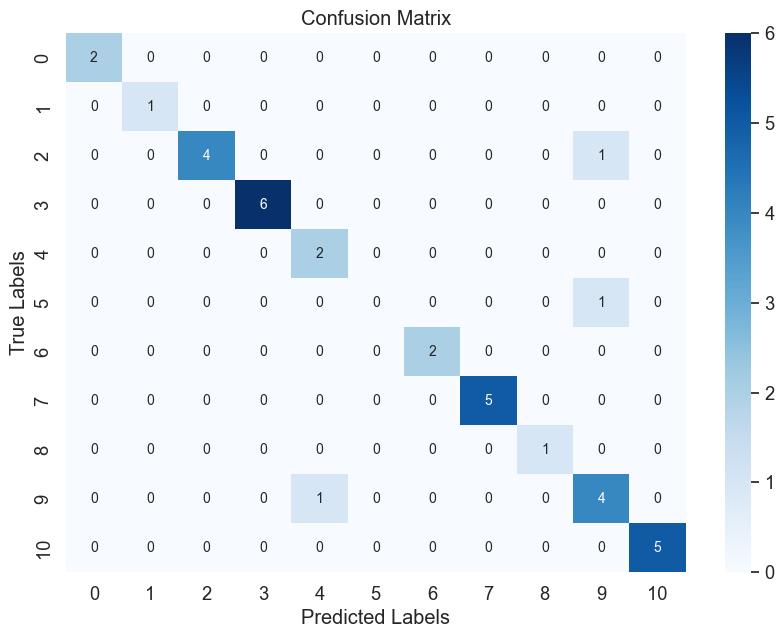

In [13]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=seed, max_iter=2000, solver='lbfgs')

# Train the model on the training data
logistic_model.fit(X_trainPCAScaler, Y_trainScaler)

# Make predictions on the validation set
logistic_predictions = logistic_model.predict(X_validationPCAScaler)

# Use the existing metrics function to evaluate the Logistic Regression model
metrics(Y_validationScaler, logistic_predictions)


# SVM

Accuracy: 0.9142857142857143
F1 score: 0.907070707070707
Recall: 0.9142857142857143
Precision: 0.938095238095238

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2
           5       1.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       0.50      1.00      0.67         1
           9       0.67      0.80      0.73         5
          10       1.00      1.00      1.00         5

    accuracy                           0.91        35
   macro avg       0.92      0.87      0.84        35
weighted avg       0.94      0.91      0.91        35



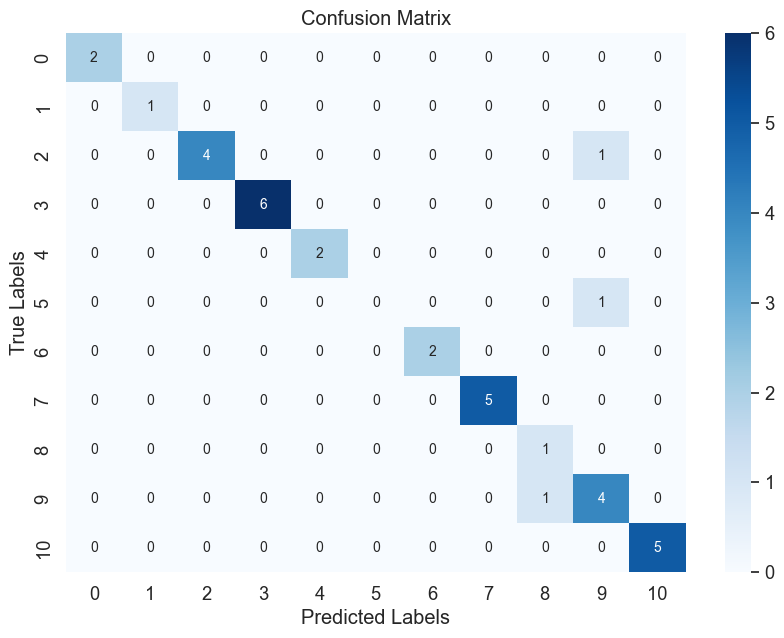

In [14]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=seed, max_iter=2000)

# Train the model on the scaled training data
svm_model.fit(X_trainPCAScaler, Y_trainScaler)

# Make predictions on the validation set
svm_predictions = svm_model.predict(X_validationPCAScaler)

# Use the existing metrics function to evaluate the SVM model
metrics(Y_validationScaler, svm_predictions)


# LINEAR DISCRIMINANT ANALYSIS (LDA)

Accuracy: 0.8285714285714286
F1 score: 0.8352380952380951
Recall: 0.8285714285714286
Precision: 0.9261904761904763

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.25      1.00      0.40         1
           2       1.00      0.60      0.75         5
           3       1.00      0.83      0.91         6
           4       0.50      1.00      0.67         2
           5       1.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         1
           9       1.00      0.60      0.75         5
          10       1.00      1.00      1.00         5

    accuracy                           0.83        35
   macro avg       0.87      0.82      0.76        35
weighted avg       0.93      0.83      0.84        35



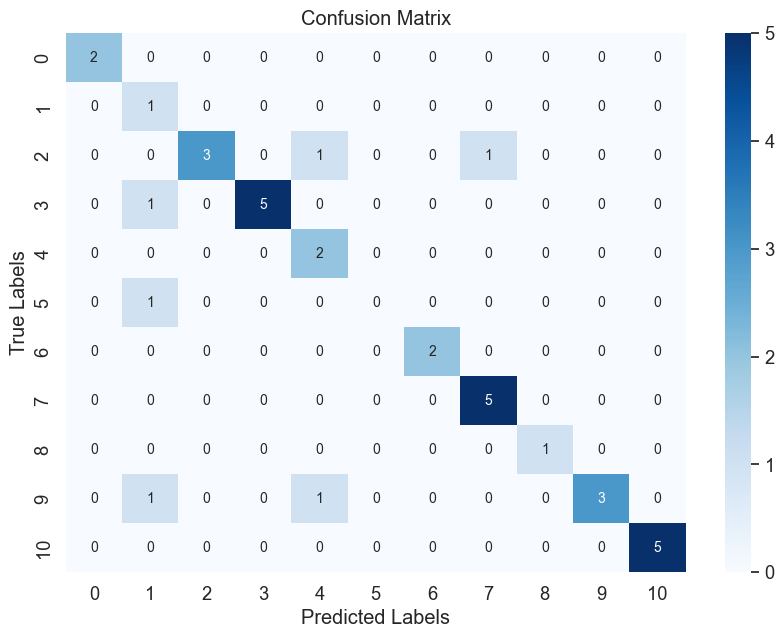

In [15]:
# Initialize the LDA model
lda_model = LinearDiscriminantAnalysis()

# Train the model on the scaled training data
lda_model.fit(X_trainPCAScaler, Y_trainScaler)

# Make predictions on the validation set
lda_predictions = lda_model.predict(X_validationPCAScaler)

# Use the existing metrics function to evaluate the LDA model
metrics(Y_validationScaler, lda_predictions)

# QUADRATIC DISCRIMINANT ANALYSIS (QDA)

E:\Python\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.2571428571428571
F1 score: 0.23138321995464853
Recall: 0.2571428571428571
Precision: 0.319047619047619

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.00      0.00         1
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         6
           4       1.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.12      0.50      0.20         2
           7       1.00      0.80      0.89         5
           8       0.00      0.00      0.00         1
           9       0.33      0.60      0.43         5
          10       0.00      0.00      0.00         5

    accuracy                           0.26        35
   macro avg       0.34      0.19      0.16        35
weighted avg       0.32      0.26      0.23        35



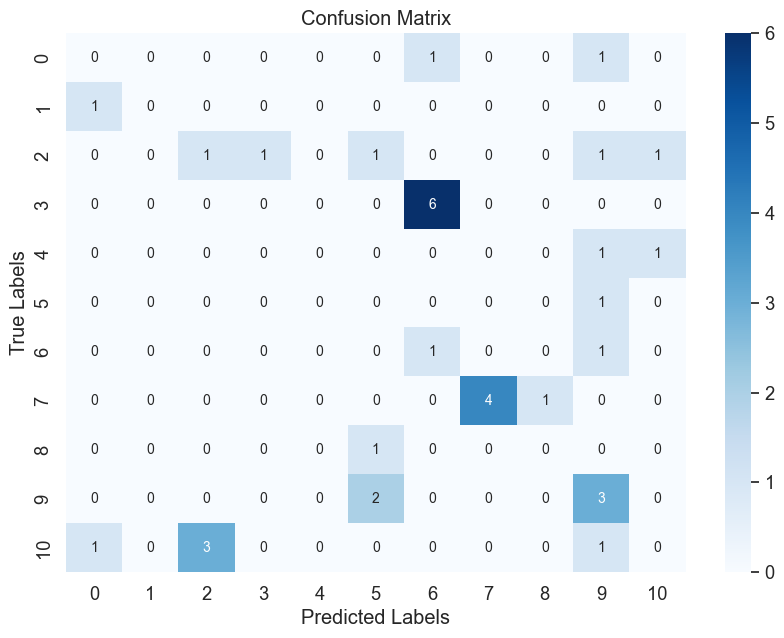

In [16]:
# Initialize the QDA model
qda_model = QuadraticDiscriminantAnalysis()

# Train the model on the PCA-transformed training data
qda_model.fit(X_trainPCAScaler, Y_trainScaler)

# Make predictions on the validation set
qda_predictions = qda_model.predict(X_validationPCAScaler)

# Use the existing metrics function to evaluate the QDA model
metrics(Y_validationScaler, qda_predictions)


# DECISION TREE

Accuracy: 0.5428571428571428
F1 score: 0.5495361781076067
Recall: 0.5428571428571428
Precision: 0.61

Classification report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       0.00      0.00      0.00         1
           2       0.75      0.60      0.67         5
           3       0.80      0.67      0.73         6
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.50      0.50      0.50         2
           7       1.00      0.80      0.89         5
           8       1.00      0.00      0.00         1
           9       0.50      0.60      0.55         5
          10       0.50      0.40      0.44         5

    accuracy                           0.54        35
   macro avg       0.50      0.42      0.39        35
weighted avg       0.61      0.54      0.55        35



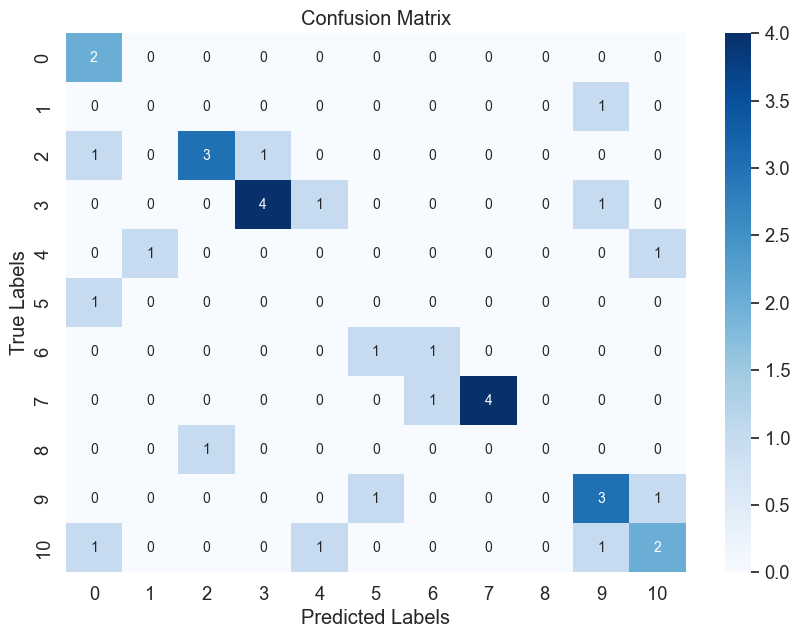

In [17]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=seed)

# Train the model on the PCA-transformed training data
decision_tree_model.fit(X_trainPCAScaler, Y_trainScaler)

# Make predictions on the validation set
dt_predictions = decision_tree_model.predict(X_validationPCAScaler)

# Use the existing metrics function to evaluate the Decision Tree model
metrics(Y_validationScaler, dt_predictions)


# GAUSSIAN NAIVE BAYES

Accuracy: 0.7142857142857143
F1 score: 0.7307936507936509
Recall: 0.7142857142857143
Precision: 0.823469387755102

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      1.00      1.00         1
           2       0.75      0.60      0.67         5
           3       1.00      0.67      0.80         6
           4       0.29      1.00      0.44         2
           5       1.00      0.00      0.00         1
           6       0.50      0.50      0.50         2
           7       1.00      0.80      0.89         5
           8       0.50      1.00      0.67         1
           9       0.80      0.80      0.80         5
          10       1.00      0.80      0.89         5

    accuracy                           0.71        35
   macro avg       0.76      0.70      0.65        35
weighted avg       0.82      0.71      0.73        35



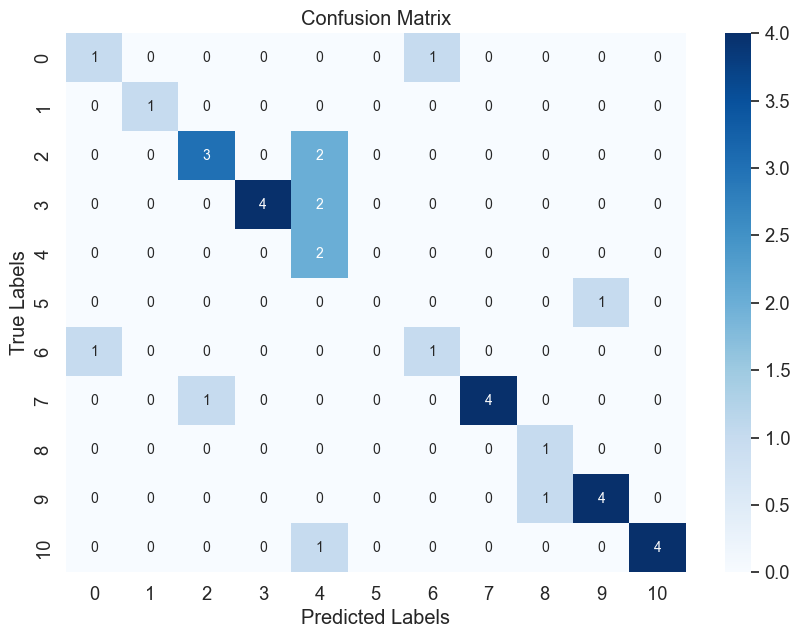

In [18]:
# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model on the PCA-transformed training data
gnb_model.fit(X_trainPCAScaler, Y_trainScaler)

# Make predictions on the validation set
gnb_predictions = gnb_model.predict(X_validationPCAScaler)

# Use the existing metrics function to evaluate the Gaussian Naive Bayes model
metrics(Y_validationScaler, gnb_predictions)


# RANDOM FOREST

Accuracy: 0.7428571428571429
F1 score: 0.7158896658896658
Recall: 0.7428571428571429
Precision: 0.8608843537414965

Classification report:
               precision    recall  f1-score   support

           0       0.29      1.00      0.44         2
           1       1.00      0.00      0.00         1
           2       1.00      1.00      1.00         5
           3       0.86      1.00      0.92         6
           4       1.00      0.50      0.67         2
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         2
           7       0.83      1.00      0.91         5
           8       0.50      1.00      0.67         1
           9       0.75      0.60      0.67         5
          10       1.00      0.60      0.75         5

    accuracy                           0.74        35
   macro avg       0.84      0.61      0.55        35
weighted avg       0.86      0.74      0.72        35



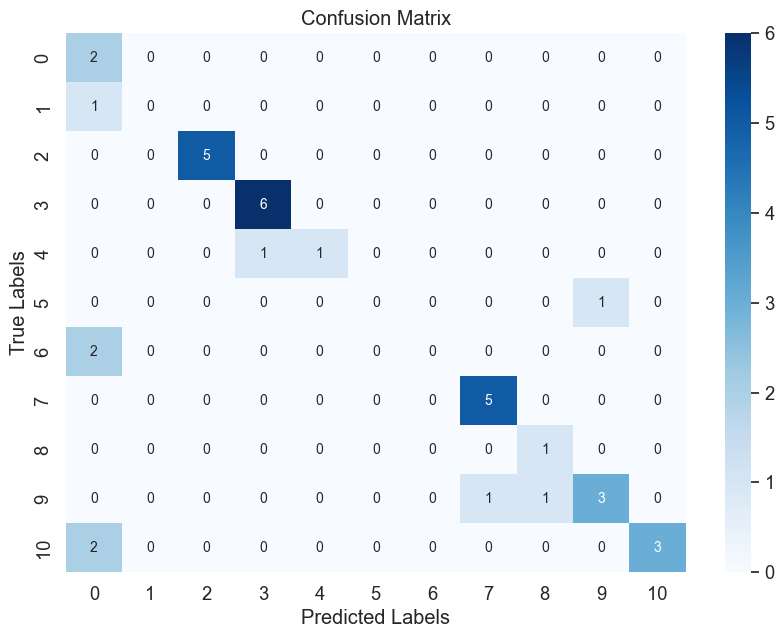

In [19]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=seed, n_estimators=100)

# Train the model on the PCA-transformed training data
rf_model.fit(X_trainPCAScaler, Y_trainScaler)

# Make predictions on the validation set
rf_predictions = rf_model.predict(X_validationPCAScaler)

# Use the existing metrics function to evaluate the Random Forest model
metrics(Y_validationScaler, rf_predictions)


# GAUSSIAN PROCESS CLASSIFER

Accuracy: 0.8857142857142857
F1 score: 0.873997113997114
Recall: 0.8857142857142857
Precision: 0.9

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         6
           4       0.67      1.00      0.80         2
           5       1.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.60      0.60      0.60         5
          10       0.83      1.00      0.91         5

    accuracy                           0.89        35
   macro avg       0.92      0.85      0.84        35
weighted avg       0.90      0.89      0.87        35



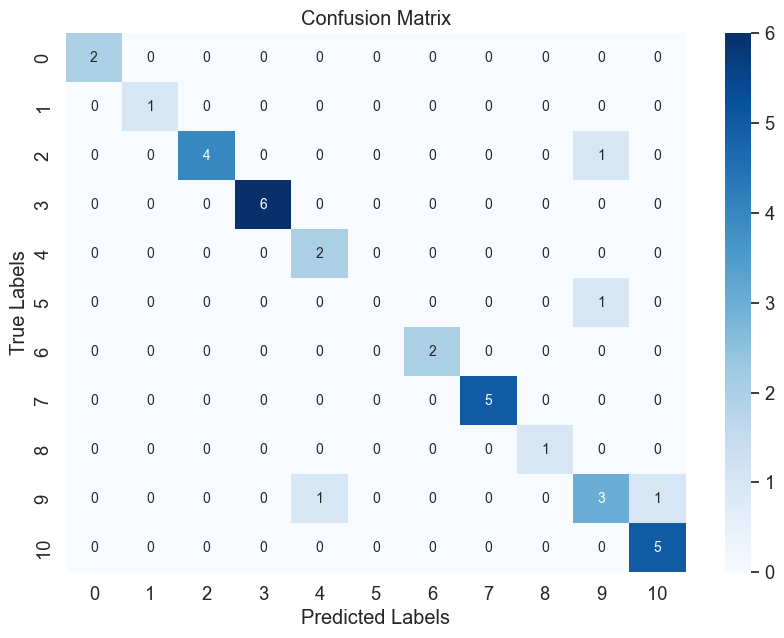

In [20]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define the kernel function for the Gaussian Process
kernel = C(10.0, (1e-3, 5000.0)) * RBF(length_scale=10.0, length_scale_bounds=(1e-2, 1000.0))

# Initialize the Gaussian Process Classifier
gpc_model = GaussianProcessClassifier(kernel=kernel, random_state=seed)

# Train the model on the PCA-transformed training data
gpc_model.fit(X_trainPCAScaler, Y_trainScaler)

# Make predictions on the validation set
gpc_predictions = gpc_model.predict(X_validationPCAScaler)

# Use the existing metrics function to evaluate the Gaussian Process Classifier model
metrics(Y_validationScaler, gpc_predictions)


# AdaBoost

Accuracy: 0.6
F1 score: 0.5428159142444857
Recall: 0.6
Precision: 0.7577777777777778

Classification report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.00      0.00         1
           2       0.44      0.80      0.57         5
           3       0.80      0.67      0.73         6
           4       1.00      0.00      0.00         2
           5       1.00      0.00      0.00         1
           6       0.50      0.50      0.50         2
           7       1.00      0.80      0.89         5
           8       1.00      0.00      0.00         1
           9       0.50      1.00      0.67         5
          10       1.00      0.20      0.33         5

    accuracy                           0.60        35
   macro avg       0.79      0.45      0.40        35
weighted avg       0.76      0.60      0.54        35



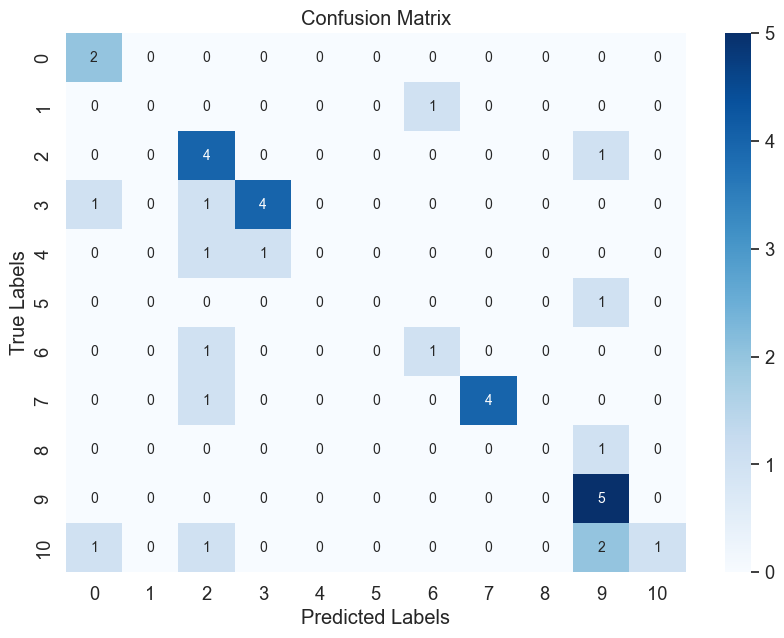

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize AdaBoost without a custom base estimator (using default DecisionTreeClassifier)
ada_model = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=seed)

# Train the model on the PCA-transformed training data
ada_model.fit(X_trainPCAScaler, Y_trainScaler)

# Make predictions on the validation set
ada_predictions = ada_model.predict(X_validationPCAScaler)

# Use the existing metrics function to evaluate the AdaBoost model
metrics(Y_validationScaler, ada_predictions)


# XGBoost

Accuracy: 0.7428571428571429
F1 score: 0.7236141636141635
Recall: 0.7428571428571429
Precision: 0.777891156462585

Classification report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.00      0.00         1
           2       1.00      0.80      0.89         5
           3       0.71      0.83      0.77         6
           4       0.50      0.50      0.50         2
           5       1.00      0.00      0.00         1
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.57      0.80      0.67         5
          10       0.75      0.60      0.67         5

    accuracy                           0.74        35
   macro avg       0.79      0.64      0.62        35
weighted avg       0.78      0.74      0.72        35



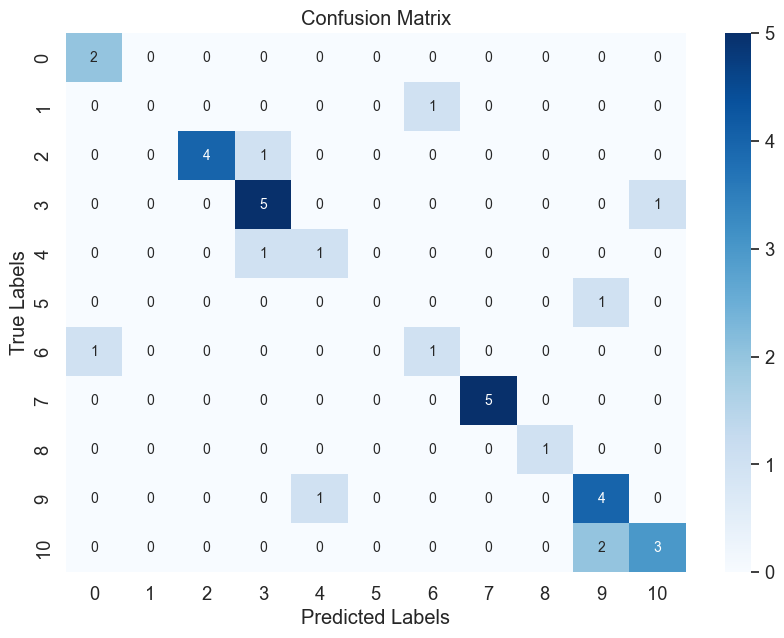

In [22]:
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize the XGBoost classifier without the use_label_encoder parameter
xgb_model = XGBClassifier(eval_metric='logloss', random_state=seed)

# Train the model on the PCA-transformed training data
xgb_model.fit(X_trainPCAScaler, Y_trainScaler)

# Make predictions on the validation set
xgb_predictions = xgb_model.predict(X_validationPCAScaler)

# Use the existing metrics function to evaluate the XGBoost model
metrics(Y_validationScaler, xgb_predictions)


# ENSEMBLING

E:\Python\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.9142857142857143
F1 score: 0.9044733044733044
Recall: 0.9142857142857143
Precision: 0.9333333333333335

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           2       1.00      0.80      0.89         5
           3       0.83      0.83      0.83         6
           4       1.00      1.00      1.00         2
           5       1.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5

    accuracy                           0.91        35
   macro avg       0.92      0.88      0.85        35
weighted avg       0.93      0.91      0.90        35



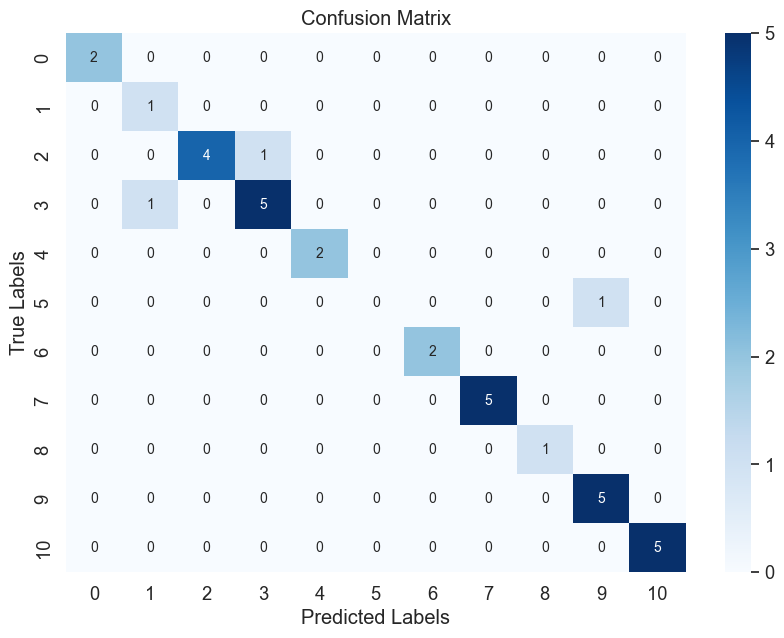

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier

# Define the seed for reproducibility
seed = 42

# Define all the classifiers with adjustments
svc_model = SVC(kernel='linear', probability=True, random_state=seed)
logistic_model = LogisticRegression(max_iter=2000, C=0.5, random_state=seed)  # Increased max_iter and added regularization
lda_model = LinearDiscriminantAnalysis()
qda_model = QuadraticDiscriminantAnalysis()
dt_model = DecisionTreeClassifier(random_state=seed)
gnb_model = GaussianNB()
rf_model = RandomForestClassifier(random_state=seed)
gpc_model = GaussianProcessClassifier(random_state=seed)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=seed, algorithm='SAMME')  # Use SAMME
xgb_model = XGBClassifier(eval_metric='logloss', random_state=seed)

# Create a voting classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('svc', svc_model),
        ('logistic', logistic_model),
        ('lda', lda_model),
        ('qda', qda_model),
        ('dt', dt_model),
        ('gnb', gnb_model),
        ('rf', rf_model),
        ('gpc', gpc_model),
        ('ada', ada_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

# Train the Voting Classifier on the PCA-transformed training data
voting_classifier.fit(X_trainPCAScaler, Y_trainScaler)

# Make predictions on the validation set
voting_predictions = voting_classifier.predict(X_validationPCAScaler)

# Use the existing metrics function to evaluate the Voting Classifier
metrics(Y_validationScaler, voting_predictions)

voting_classifier = VotingClassifier(
    estimators=[...],
    voting='soft',
    weights=[1, 10, 1, 1, 1, 8, 1, 1, 1, 1]  # Adjust weights based on individual classifier performance
)



In [24]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
# from sklearn.linear_model import LinearRegression

# # Define the parameter grids for each classifier
# param_grids = {
#     'SVC': {
#         'C': [0.1, 1, 10],
#         'kernel': ['linear', 'rbf'],
#         'gamma': ['scale', 'auto']
#     },
#     'DecisionTree': {
#         'max_depth': [None, 5, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'criterion': ['gini', 'entropy']
#     },
#     'RandomForest': {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 5, 10],
#         'min_samples_split': [2, 5, 10],
#         'criterion': ['gini', 'entropy']
#     },
#     'GaussianNB': {
#         # Gaussian Naive Bayes does not have many hyperparameters to tune
#         'priors': [None]  # Change to a list of possible prior probabilities if required
#     },
#     'XGBoost': {
#         'n_estimators': [50, 100],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'max_depth': [3, 5, 7],
#         'subsample': [0.5, 0.75, 1],
#         'colsample_bytree': [0.5, 0.75, 1]
#     },
#     'AdaBoost': {
#         'n_estimators': [50, 100],
#         'learning_rate': [1.0, 0.5, 0.1]
#     },
#     'GaussianProcess': {
#         'kernel': [1.0 * RBF(length_scale=1.0), 1.0 * RBF(length_scale=10.0)],  # Adjust based on your model needs
#         'optimizer': ['fmin_l_bfgs_b', None]
#     },
#     'LinearRegression': {
#         'fit_intercept': [True, False],
#         'normalize': [True, False],  # Deprecated in newer versions; can be omitted if necessary
#         'copy_X': [True, False]
#     }
# }

# # Initialize classifiers
# classifiers = {
#     'SVC': SVC(probability=True),
#     'DecisionTree': DecisionTreeClassifier(),
#     'RandomForest': RandomForestClassifier(),
#     'GaussianNB': GaussianNB(),
#     'XGBoost': XGBClassifier(use_label_encoder=True, eval_metric='logloss'),
#     'AdaBoost': AdaBoostClassifier(),
#     'GaussianProcess': GaussianProcessClassifier(),
#     'LinearRegression': LinearRegression()
# }

# # Function to tune classifiers
# def tune_classifier(clf, param_grid, X_train, y_train):
#     grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
#     grid_search.fit(X_train, y_train)
#     return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# # Perform tuning for each classifier
# best_classifiers = {}
# for name, clf in classifiers.items():
#     print(f"Tuning {name}...")
#     best_clf, best_params, best_score = tune_classifier(clf, param_grids[name], X_trainPCAScaler, Y_trainScaler)
#     best_classifiers[name] = {
#         'best_estimator': best_clf,
#         'best_params': best_params,
#         'best_score': best_score
#     }
#     print(f"Best {name} params: {best_params} with score: {best_score}\n")
